In [23]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./resources/NAFO_divisions/NAFO_divisions_2021.csv', encoding='ISO-8859-1')
df[["NAFO_Division", "lat_dd", "long_dd"]]

In [7]:
nafo_divisions = df['NAFO_Division'].unique()
print(nafo_divisions)

['0-A' '0-B' '1A' '1B' '1C' '1D' '1E' '1F' '2G' '2H' '2J' '3K' '3L' '3M'
 '3N' '3O' '3P' '4R' '4S' '4T' '4V' '4W' '4X' '5Y' '5Z' '6A' '6B' '6C'
 '6D' '6E' '6F' '6G' '6H']


In [ ]:
# Load the shapefile (make sure all related files are in the same folder)
shapefile_path = "./resources/NAFO_divisions/NAFO_Divisions_SHP/NAFO_Divisions_2021_poly_not_clipped.shp"
gdf = gpd.read_file(shapefile_path)

# Export to GeoJSON
geojson_path = "./data/NAFO_divisions.geojson"
gdf.to_file(geojson_path, driver="GeoJSON")

print(f"GeoJSON saved to {geojson_path}")

gdf = gpd.read_file("./data/NAFO_divisions.geojson")

# Access the 'Label' column
unique_labels = gdf["Division"].unique()
print(unique_labels)

GeoJSON saved to NAFO_divisions.geojson


In [ ]:
#Código para hacer un mapa de las divisiones en folium
# Load GeoJSON
gdf = gpd.read_file("./data/NAFO_divisions.geojson")

# Reproject to a projected CRS (e.g., EPSG:3857)
gdf_proj = gdf.to_crs(epsg=3857)

# Calculate centroid from projected CRS using union_all()
centroid_proj = gdf_proj.geometry.union_all().centroid

# Convert centroid back to geographic CRS (EPSG:4326) for Folium
centroid_geo = gpd.GeoSeries([centroid_proj], crs="EPSG:3857").to_crs(epsg=4326)
center_coords = [centroid_geo.geometry.y[0], centroid_geo.geometry.x[0]]

# Create Folium map
m = folium.Map(location=center_coords, zoom_start=4)

# Add original GeoJSON (in EPSG:4326) to map
folium.GeoJson(gdf, tooltip=folium.GeoJsonTooltip(fields=["Label"])).add_to(m)

# Save map
m.save("./maps/nafo_map.html")

<Axes: >

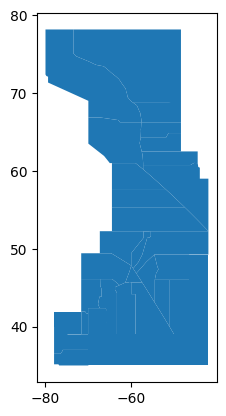

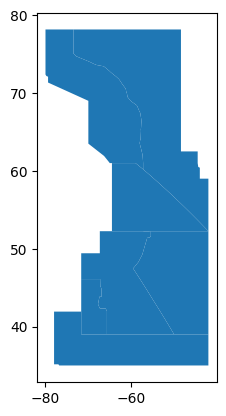

In [ ]:
gdf = gpd.read_file("./data/NAFO_divisions.geojson")
gdf.plot()

# Dissolve polygons by SubArea
dissolved = gdf.dissolve(by='SubArea')
dissolved.plot()